# **미니프로젝트 4차 1대1 문의 내용 유형 분류기**
# 단계1 : 데이터 탐색

### 문제 정의
> 1:1 문의 내용 분류 문제<br>
> 1. 문의 내용 분석
> 2. 문의 내용 분류 모델 성능 평가
### 학습 데이터
> * 1:1 문의 내용 데이터 : train.csv

### 변수 소개
> * text : 문의 내용
> * label : 문의 유형

### References
> * 한국어 처리
>> * [konlpy - 한국어 처리 라이브러리](https://konlpy.org/ko/latest/)
>> * [한국어 품사 태그 비교표](https://docs.google.com/spreadsheets/d/1OGAjUvalBuX-oZvZ_-9tEfYD2gQe7hTGsgUpiiBSXI8/edit#gid=0)
>> * [한국어 품사 태깅 성능 비교](https://konlpy.org/ko/latest/morph/#comparison-between-pos-tagging-classes)
>> * [한국어 시스템 사전](https://konlpy.org/ko/latest/data/#corpora)

> * 자연어 처리
>> * [NLTK](https://www.nltk.org/book/)
>> * [gensim](https://radimrehurek.com/gensim/)
>> * [Google guide](https://developers.google.com/machine-learning/guides/text-classification/step-2)
>> * [WordCloud](https://amueller.github.io/word_cloud/)

## 1. 개발 환경 설정

* 세부 요구사항
  - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
  - 필요하다고 판단되는 라이브러리를 추가하세요.
  - konlpy, mecab 설치 후 형태소 분석 함수 생성
  - mecab 설치할 때 윈도우 pc에서 설치는 다른 방법으로 진행
  - 윈도우 환경일 경우 KoNLPy의 라이브러리 설치가 제대로 이루어지지 않을 수 있습니다
  - 윈도우 설치를 위한 참고 링크
    - https://liveyourit.tistory.com/56

### 1-1. 라이브러리 설치

In [ ]:
# 필요 라이브러리부터 설치할께요.
!pip install konlpy pandas seaborn gensim wordcloud python-mecab-ko wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 53.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.6/575.6 KB 40.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 KB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 16.7 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=9bfde065efed8ad528419881ecf41ae0086092283d22c42be7a58d0c22de7d83
  Stored in directory: /root/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget


### 1-2. 라이브러리 import

In [ ]:
from mecab import MeCab
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from wordcloud import WordCloud
from collections import Counter
import wget, os

### 1-3. 한글 글꼴 설정(Windows)

In [ ]:
if not os.path.exists("malgun.ttf"): 
    wget.download("https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf")
if 'malgun' not in fm.fontManager.findfont("Malgun Gothic"):
    fm.fontManager.addfont("malgun.ttf")
if plt.rcParams['font.family']!= ["Malgun Gothic"]:
    plt.rcParams['font.family']= [font for font in fm.fontManager.ttflist if 'malgun.ttf' in font.fname][-1].name
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
assert plt.rcParams['font.family'] == ["Malgun Gothic"], "한글 폰트가 설정되지 않았습니다."
FONT_PATH = "malgun.ttf"

HTTPError: ignored

### 1-4. 자바 경로 설정(Windows)

In [ ]:
os.environ['JAVA_HOME'] = "C:\Program Files\Java\jdk-19"

### 1-3. 한글 글꼴 설정(Colab)

In [ ]:
!sudo apt-get install -y fonts-nanum

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-525
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (6,660 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [ ]:
FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=FONT_PATH, size=10).get_name()
print(font_name)
plt.rcParams['font.family']=font_name
assert plt.rcParams['font.family'] == [font_name], "한글 폰트가 설정되지 않았습니다."

NanumGothic


### 1-4. 구글드라이브 연결(Colab)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2.데이터 불러오기

* 주어진 데이터
 - 학습 및 검증용 데이터 : train.csv

### 2-1. 데이터 로딩

* 다음 데이터를 불러옵니다.
    * 학습 및 검증용 데이터 : train.csv
    * shape를 확인합니다.

In [ ]:
# train_pd = pd.read_csv("/content/drive/MyDrive/2023.04.03_미니프로젝트4차_실습자료/train.csv")
# train_pd.shape
train_df = pd.read_csv("/content/drive/MyDrive/2023.04.03_미니프로젝트4차_실습자료/train.csv")


In [ ]:
train = train_pd

In [ ]:
train_df.head()

,text,label
0,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",코드2
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,웹
2,glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...,코드2
3,"tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...",코드2
4,filename = TEST_IMAGE + str(round(frame_sec)) ...,코드2


### 2-2. 데이터 확인하기
* 문의 유형 분포 확인
* data type, 결측치 확인

,text,label
0,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",코드2
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,웹
2,glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...,코드2
3,"tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...",코드2
4,filename = TEST_IMAGE + str(round(frame_sec)) ...,코드2
5,"저는 헬스케어, 그중에서도 정신건강에 대해 관심이 많습니다. 디지털 치료제와 관련한...",이론
6,PDF파일을 보시면 7페이지에 제안사 인프라는 3Tier로 구성(WEB/WAS/DB...,웹
7,범주형 데이터와 숫자형 데이터 설명해주신 내용 잘 읽었습니다. 계속 읽고 적응해나아...,이론
8,첨부파일에 3375.번에 대해 정답인 코드로 돌렸을 시 다 패스가 출력되었지만 문제...,코드1
9,다시 쳐보기도 하면 오타 확인했지만 오타는 없었습니다. 그리고 해당 index파일도...,웹


코드2       1097
웹          732
이론         728
시스템 운영     561
코드1        488
원격         100
Name: label, dtype: int64

----------------------------------------------------------------------------------------------------


코드2       0.296006
웹         0.197518
이론        0.196438
시스템 운영    0.151376
코드1       0.131678
원격        0.026983
Name: label, dtype: float64

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50937 (\N{HANGUL SYLLABLE WEB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47200 (\N{HANGUL SYLLABLE RON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/c

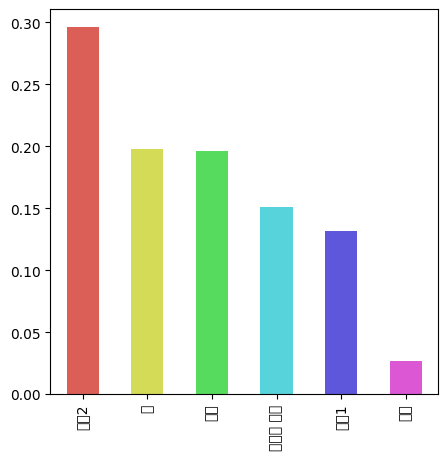

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3706 entries, 0 to 3705
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3706 non-null   object
 1   label   3706 non-null   object
dtypes: object(2)
memory usage: 58.0+ KB


,text,label
count,3706,3706
unique,3706,6
top,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",코드2
freq,1,1097


In [ ]:
# # 강사님 코드
# display(train_df.head(10))
# display(train_df.label.value_counts())
# print("-" * 100)
# norm_label = train_df.label.value_counts(normalize=True)
# display(norm_label)
# norm_label.plot.bar(figsize=(5,5), color=sns.color_palette('hls', n_colors = len(norm_label)))
# plt.show()
# train_df.info()
# display(train_df.describe(include='all'))

In [ ]:
print(train['label'].value_counts())

코드2       1097
웹          732
이론         728
시스템 운영     561
코드1        488
원격         100
Name: label, dtype: int64


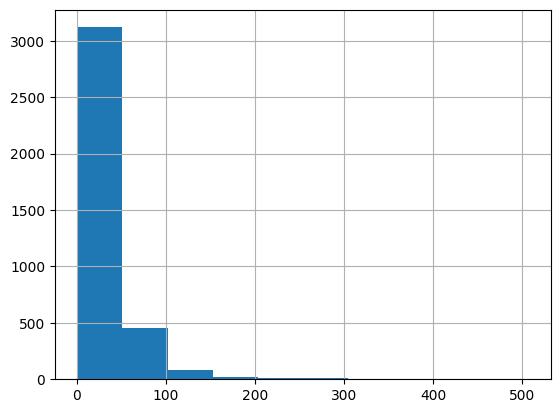

In [ ]:
#토큰 수
text = train['text'].str.split().map(lambda x: len(x)).hist()   # y: 빈도수, x : 토큰 수 => 50개 이하의 토큰(띄어쓰기 탭. 개행 근데 한글 영어 섞여서 불확실)

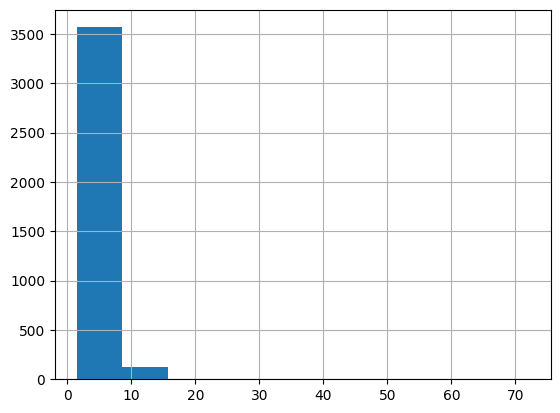

In [ ]:
#토큰별 길이 평균
text = train['text'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

# x: 토큰 길이 평균, y: 빈도수 => 5~6개 미만의 토큰(어절)들이 자주 쓰였다. 

In [ ]:
train['text'].size

3706

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3706 entries, 0 to 3705
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3706 non-null   object
 1   label   3706 non-null   object
dtypes: object(2)
memory usage: 58.0+ KB


In [ ]:
train.isnull().sum()

text     0
label    0
dtype: int64

## 3.데이터 탐색하기


### 3-1. 문의 내용 길이 분포

* 문의 내용의 길이 분포를 확인합니다.
* 최소, 최대 길이의 index 및 문의 내용을 확인합니다.

------------------------------------------------------------------------------------------------------------------------
최대 길이:  sns.kdeplot(x = td[var])
plt.show()

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
 in 
----&gt; 1 sns.kdeplot(x = td[var])
      2 plt.show()

~\anaconda3\lib\site-packages\seaborn\_decorators.py in inner_f(*args, **kwargs)
     44             )
     45         kwargs.update({k: arg for k, arg in zip(sig.parameters, args)})
---&gt; 46         return f(**kwargs)
     47     return inner_f
     48 

~\anaconda3\lib\site-packages\seaborn\distributions.py in kdeplot(x, y, shade, vertical, kernel, bw, gridsize, cut, clip, legend, cumulative, shade_lowest, cbar, cbar_ax, cbar_kws, ax, weights, hue, palette, hue_order, hue_norm, multiple, common_norm, common_grid, levels, thresh, bw_method, bw_adjust, log_scale, color, fill, data, data2, warn_singular, **kwargs

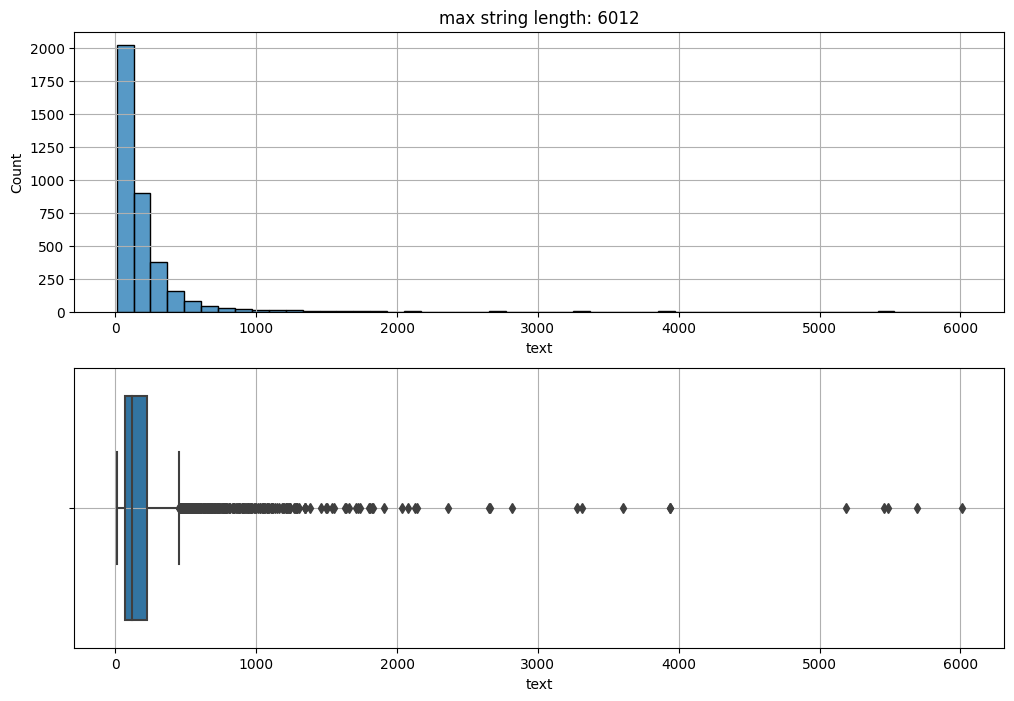

In [ ]:
# # 강사님 코드
# print("-" * 120)
# text_length = train_df.text.str.len()
# print("최대 길이: ", train_df.text[text_length.argmax()], text_length.argmax())
# print("최소 길이: ", train_df.text[text_length.argmin()], text_length.argmin())
# plt.figure(figsize=(12, 8))
# plt.subplot(2, 1, 1, title='max string length: ' + str(max(text_length)))
# sns.histplot(text_length, bins=50)
# plt.grid()

# plt.subplot(2, 1, 2)
# sns.boxplot(x=text_length)
# plt.grid()
# plt.show()

In [ ]:
text = train['text'].tolist()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 75.1 MB/s eta 0:00:00


Text(0.5, 0, 'ㅇㅇ')

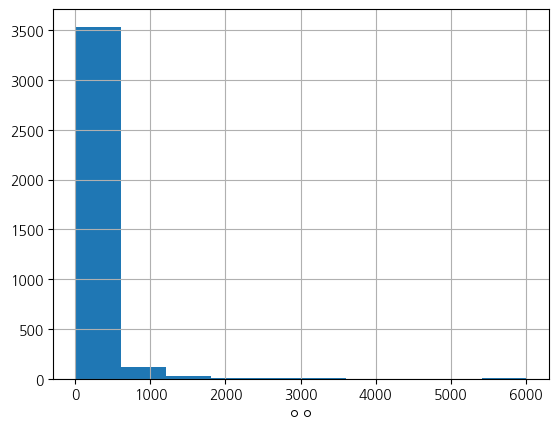

In [ ]:
!pip install koreanize-matplotlib
import koreanize_matplotlib
text = train['text'].str.len().hist()   # x:글자 수, y:빈도수 => 주로 1000자 이하임 (600이하?)
text.set_xlabel("ㅇㅇ")

In [ ]:
temp_list = []
for i in range( len(text)):
    temp_list.append(len(text[i]))
print(max(temp_list))
print(min(temp_list))

TypeError: ignored

In [ ]:
train['text'].loc[train['text'].str.len() == 9]

756    원격 부탁드립니다
841    지원부탁드립니다!
Name: text, dtype: object

### 3-2. 명사 추출하고 품사 태깅하기

* konlpy, MeCab을 활용하여 품사 태깅, 명사 추출하기.
* 2개 이상의 형태소 분석기를 Time analysis 해보기
* Number of Samples / Number of words per sample 구해보기

In [ ]:
import nltk
nltk.download('stopwords')
from konlpy.tag import Okt
from mecab import MeCab
mecab = MeCab()
okt = Okt()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# # 강사님 코드
# if 'okt_morphs' not in globals():
#     %time okt_morphs = train_df.text.apply(lambda t:okt.morphs(str(t)))
#     %time okt_nouns = train_df.text.apply(lambda t:okt.nouns(str(t)))
#     %time okt_pos = train_df.text.apply(lambda t:okt.pos(str(t), norm=True, stem=True, join=True))

CPU times: user 42.7 s, sys: 414 ms, total: 43.1 s
Wall time: 34 s
CPU times: user 24.3 s, sys: 87.4 ms, total: 24.4 s
Wall time: 23.9 s
CPU times: user 43.6 s, sys: 184 ms, total: 43.8 s
Wall time: 41.1 s


In [ ]:
# # 강사님 코드
# def mecab_tokenizer(string):
#     return list("/".join(res) for res in mecab.pos(str(string)))

In [ ]:
# # 강사님 코드
# if 'morphs' not in globals():
#     %time morphs = train_df.text.apply(lambda t:mecab.morphs(str(t)))
#     %time nouns = train_df.text.apply(lambda t:mecab.nouns(str(t)))
#     %time pos_tuple = train_df.text.apply(lambda t:mecab.pos(str(t)))
#     %time pos = train_df.text.apply(mecab_tokenizer)

In [ ]:
# # 강사님 코드
# # Number of Samples / Number of words per sample 
# len(pos).pos.apply(len).mean()

AttributeError: ignored

In [ ]:
%%time
from konlpy.tag import Okt

okt = Okt()
for idx, sentence in enumerate(text) :
    text[idx] =okt.pos(sentence, join=True)
    # print(text[idx])
    

noun = okt.nouns(train['text'].to_string())
count = Counter(noun)

CPU times: user 41 s, sys: 345 ms, total: 41.3 s
Wall time: 32.6 s


In [ ]:
count

Counter({'현재': 58,
         '이미지': 52,
         '개': 99,
         '업로드': 27,
         '위해': 49,
         '자바스크립트': 2,
         '적': 6,
         '폼': 1,
         '생': 76,
         '를': 222,
         '사용': 109,
         '때': 271,
         '질문': 229,
         '저': 31,
         '헬': 2,
         '스케': 2,
         '중': 155,
         '정신건강': 3,
         '대해': 66,
         '관심': 1,
         '디지털': 2,
         '치료': 1,
         '제': 141,
         '관련': 117,
         '파일': 238,
         '보시': 1,
         '페이지': 54,
         '제안': 25,
         '사': 17,
         '인프라': 12,
         '로': 144,
         '구성': 19,
         '범주': 25,
         '데이터': 298,
         '숫자': 40,
         '설명': 64,
         '내용': 83,
         '계속': 80,
         '첨부파일': 9,
         '번': 180,
         '정답': 16,
         '코드': 201,
         '시': 59,
         '패스': 2,
         '출력': 67,
         '문제': 246,
         '다시': 133,
         '보기': 15,
         '오타': 7,
         '확인': 128,
         '해당': 76,
         '만약': 18,
         '

In [ ]:
main_pos = [] # 데이터프레임의 새 컬럼이 될 리스트
for sentence in train['text']: # 리뷰들을 하나씩 가져옵니다
    pos = okt.pos(sentence) # 형태소 분석을 진행하고 해당 리스트를 pos라는 변수로 받습니다
    main_words = [word_pos[0] for word_pos in pos if word_pos[1] in ("Noun")] # 가져오고자 하는 품사에 해당하면 해당 형태소를 main_words 리스트에 추가합니다.
    main_words_str = " ".join(main_words) # main_words 리스트 안의 형태소들을 띄어쓰기로 분리된 하나의 문자열로 join시켜줍니다.
    main_pos.append(main_words_str) # 선택한 형태소들로 이루어진 문자열을 최종 리스트에 추가해줍니다
train["noun"] = main_pos # 리스트를 데이터프레임으로 변환해 main_pos라는 컬럼명으로 추가해줍니다.

train.head() # 데이터 확인

,text,label,noun
0,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",0,여기 커널 사이즈 은 단어 최대 길이 이 가정 그냥 선언 것
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,1,현재 이미지 개 업로드 위해 자바스크립트 적 폼 개 생 클릭 생 뭘 수가 혹시 기본...
2,glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...,0,를 사용 때 질문 포함 제대로 작동 것 질문 제공 파일 폴더 포함 이 폴더 안 이 ...
3,"tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...",0,오류 해결
4,filename = TEST_IMAGE + str(round(frame_sec)) ...,0,안 폴더 안 이미지 저장 는걸 이해 실행 폴더 이미지 저장 질문


In [ ]:
sum_len = 0 # 총 단어 개수
for v,len_v, in count.items():
    sum_len += len_v

print(sum_len)

21491


In [ ]:
okt = Okt()
noun = okt.nouns(train['text'].to_string())

words = []
for n in noun:
    if len(n) > 1:
        words.append(n)

count = Counter(words)
noun_list = count.most_common(100)

for v,len, in noun_list:
    print(v,':',round(len/sum_len,10))

실습 : 0.0212181844
데이터 : 0.0138662696
문제 : 0.0114466521
파일 : 0.0110744032
질문 : 0.0106556233
제출 : 0.0101903122
코드 : 0.0093527523
문의 : 0.0080033502
진행 : 0.0078637569
오류 : 0.0076311014
부분 : 0.0074915081
모델 : 0.0066074171
혹시 : 0.0063282304
다시 : 0.0061886371
강사 : 0.0060955749
확인 : 0.0059559816
실행 : 0.0056767949
관련 : 0.0054441394
입력 : 0.0051184217
사용 : 0.0050718906
강의 : 0.0050253595
경우 : 0.0044204551
이해 : 0.0042808618
튜터님 : 0.0041412684
오늘 : 0.0040947373
변수 : 0.0040482062
내용 : 0.0038620818
계속 : 0.0037224885
에러 : 0.0037224885
프로젝트 : 0.0035828952
해당 : 0.0035363641
피드백 : 0.0035363641
과정 : 0.0035363641
시간 : 0.0035363641
코딩 : 0.003489833
처리 : 0.003489833
사진 : 0.0034433018
분석 : 0.0033967707
테스트 : 0.0033037085
다음 : 0.0032571774
학습 : 0.0032571774
작성 : 0.0032106463
추가 : 0.0031641152
과제 : 0.0031641152
수업 : 0.0031641152
결과 : 0.0031641152
러닝 : 0.0031641152
출력 : 0.0031175841
대해 : 0.003071053
아래 : 0.0030245219
설명 : 0.0029779908
요청 : 0.0029779908
함수 : 0.0029314597
대한 : 0.0029314597
방법 : 0.0028849286
접속 : 0.

In [ ]:
okt = Okt()
noun = okt.nouns(train['text'].to_string())

words = []
for n in noun:
    if len(n) > 1:
        words.append(n)

count = Counter(words)

noun_list = count.most_common(100)
for v in noun_list:
    print(v)

('실습', 456)
('데이터', 298)
('문제', 246)
('파일', 238)
('질문', 229)
('제출', 219)
('코드', 201)
('문의', 172)
('진행', 169)
('오류', 164)
('부분', 161)
('모델', 142)
('혹시', 136)
('다시', 133)
('강사', 131)
('확인', 128)
('실행', 122)
('관련', 117)
('입력', 110)
('사용', 109)
('강의', 108)
('경우', 95)
('이해', 92)
('튜터님', 89)
('오늘', 88)
('변수', 87)
('내용', 83)
('계속', 80)
('에러', 80)
('프로젝트', 77)
('해당', 76)
('피드백', 76)
('과정', 76)
('시간', 76)
('코딩', 75)
('처리', 75)
('사진', 74)
('분석', 73)
('테스트', 71)
('다음', 70)
('학습', 70)
('작성', 69)
('추가', 68)
('과제', 68)
('수업', 68)
('결과', 68)
('러닝', 68)
('출력', 67)
('대해', 66)
('아래', 65)
('설명', 64)
('요청', 64)
('함수', 63)
('대한', 63)
('방법', 62)
('접속', 61)
('미니', 59)
('첨부', 59)
('현재', 58)
('설정', 58)
('어제', 57)
('답변', 56)
('해결', 55)
('페이지', 54)
('자료', 53)
('이미지', 52)
('지금', 52)
('기준', 52)
('발생', 51)
('위해', 49)
('다른', 48)
('예측', 47)
('저장', 47)
('이유', 47)
('마스터', 45)
('차이', 44)
('무엇', 43)
('고객', 43)
('시험', 42)
('말씀', 41)
('개인', 41)
('그래프', 41)
('숫자', 40)
('하나', 40)
('셀프', 40)
('변경', 40)
('인스턴스', 39)
('모델링', 39

In [ ]:
%%time
text_i = [train['text']]
from mecab import MeCab
mecab = MeCab()
text = []
for idx, sentence in enumerate(text_i) :
    # text[idx] = " ".join(okt.nouns(sentence)) 
    text[idx] = mecab.nouns(sentence)
    print(text[idx])

TypeError: ignored

In [ ]:
print(text)

[]


### 3-3. nltk로 텍스트 분석하기
* 3-2.의 명사 추출, 품사 태깅한 데이터를 nltk Text로 변경하기
* 각각 token 갯수 / 전체 token 비율(Type-Token Ratio) 알아보기
* 각각 Frequency 확인 및 분포 시각화
* 명사 추출한 데이터에서 코드, 웹, 이론, 원격, 시스템 등 관심있는 각 단어에 분석해보기
* 각각 collocation 확인
* 최소 길이 문의 내용에 대해 grammar pasing 해보기(아래 코드 활용)


```python
grammar = """
NP: {<N.*>*<Suffix>?}   # Noun phrase
VP: {<V.*>*}            # Verb phrase
AP: {<A.*>*}            # Adjective phrase
"""
NP_grammar = "NP: {<Adjective>*<Noun>*}"
```

In [ ]:
# # 강사님 코드
# %%time
# nltk_nouns = nltk.Text(nouns.explode())
# nltk_nouns = nltk.Text(w for w in nltk_nouns if isinstance(w, str))
# nltk_morphs = nltk.Text(morphs.explode())
# nltk_morphs = nltk.Text(w for w in nltk_morphs if isinstance(w, str))
# nltk_pos = nltk.Text(pos.explode())
# nltk_pos_tuple = nltk.Text(pos_tuple.explode())

CPU times: user 170 ms, sys: 2.97 ms, total: 173 ms
Wall time: 175 ms


In [ ]:
text_ = train['text']
label_ = train['label']
noun_ = train['noun']

In [ ]:
import nltk
from nltk import Text
from nltk.tokenize import RegexpTokenizer, word_tokenize
plt.figure(figsize = (10,4))
g_data4 = nltk.Text(noun, name=" 다빈도 단어 그래프 출력하기")
g_data4.plot(20)

NameError: ignored

<Figure size 1000x400 with 0 Axes>

### 3-4. Wordcloud 만들기
* 명사 추출/형태소 분석 결과를 이용하여 WordCloud 객체를 생성
* 최대 글꼴 크기(max_font_size), 최대 단어 수(max_words), 배경 색상(background_color)
* 상대 크기비율(relative_scaling), 그림 크기(width, height), 폰트 경로(font_path=FONT_PATH) 등 설정
* .generate 메서드를 연결하여 WordCloud에 사용될 텍스트 데이터 생성
* plt.imshow(  ) 를 통해 화면에 보여집니다.

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import re
import collections
import numpy as np

data7 = dict(noun_list)
wordcloud = WordCloud(font_path ="NanumGothic", relative_scaling = 0.3, background_color = 'black').generate_from_frequencies(data7)
plt.figure(figsize=(10,4))
plt.imshow(wordcloud)

NameError: ignored

## 4. 문의 유형에 따른 분석
### 4-1. *3. 데이터 탐색*에서 실행한 알고리즘을 문의 유형에 따라 실행할 수 있는 함수를 개발합니다.
* 아래 text_analysis 함수를 개발합니다.

In [ ]:
def text_analysis(df, label=None):
    """
    label에 따라서 분석, label이 None인 경우 전체 분석
    데이터 확인, 데이터 길이 시각화
    명사 추출하여 분석, 워드 클라우드 시각화

    Parameters
    ----------
    df : pandas DataFrame object.
    label : Label for analysis, default=None.
    - If label is None, Entire data are analyzed.

    Returns
    -------
    result : None

    """
    pass
    print("*" * 120)
    if label is None:
        text_question=df['text'].reset_index(drop=True)
        display(df.label.value_counts())
        norm_label=df.label.value_counts(normalize=True)
        display(norm_label)
        # norm_label.plot.bar(figsize=(5,5),color=sns.color_pallete('hls',n_colors=len(norm_label)))
        # plt.show()
        df.info()
    else:
        text_question=df.loc[train_df['label']==label,'text'].reset_index(drop=True)
        display(f"유형:{label}",text_question.head(10))
    #데이터확인
    display(text_question.describe(include='all'))
    #데이터 길이 분포 시각화

    text_length=text_question.apply(len)
    display(pd.DataFrame(text_length).describe().T)
    print("-"*120)
    print("최대길이:", text_question[text_length.argmax()])
    print("최소길이:", text_question[text_length.argmin()])

    plt.figure(figsize=(12,8))
    plt.subplot(2,1,1,title="max string length:" + str(max(text_length)))
    sns.histplot(text_length,bins=50)
    plt.grid()

    plt.subplot(2,1,2)
    sns.boxplot(x=text_length)
    plt.grid()
    plt.show()
    print("-"*120)

    nouns=text_question.apply(lambda t:mecab.nouns(str(t)))
    nouns=nltk.Text(nouns.explode())
    nouns=nltk.Text([w for w in nouns if isinstance(w,str)])
    #word cloud
    cloud = WordCloud(
        max_font_size=100,max_words=50,
        background_color='white',relative_scaling=1,
        width=800,height=600,font_path=FONT_PATH).generate(" ".join(nouns))
    plt.figure(figsize=(12,6))
    plt.imshow(cloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()
    
    



### 4-2. 각각의 문의 유형에 대해 실행합니다.

************************************************************************************************************************


'유형:시스템 운영'

0           한달에 한번 지원금 들어오기로 했는데 국민 내일배움카드로 입금은 언제되나요?
1    안녕하세요 \n\n코딩마스터스 재밌게 하고 있는 에이블러입니다.\n\n코딩마스터스가...
2    금요일에 홈페이지 점검이 있다는 내용을 들었었는데, 금일 접속해 보니 다른 곳은 다...
3    운영자 02님 혹시 원격 기다리실까봐 문의글 남깁니다.\n어차피 오전시간 얼마 안 ...
4    안녕하세요 DX7조입니다.\n제출 버튼에 ppt 파일을 먼저 제출하고 나서 발표영상...
5    안녕하세요!\n\n갑자기 셀프 테스트를 보는 도중 창이 다 꺼지고 홈으로 돌아갔는데...
6    AIDU 환경에서 한번 나오면 시험 끝이라는 강사님 말씀을 듣고 질문을 남깁니다.\...
7    최종개별실습 파일제출시에 제가 다른 경로로 저장한 빈파일을 올려서 \n소스코드가 하...
8    채점 했을때는 전부 pass로 뜨는데 제출하면 오답이라고 하는데 제출할 때 다른 케...
9    11월 10일 개인과제 제출 버튼을 누르면 아래와 같은 화면이 뜨면서 과제 제출이 ...
Name: text, dtype: object

count                                            561
unique                                           561
top       한달에 한번 지원금 들어오기로 했는데 국민 내일배움카드로 입금은 언제되나요?
freq                                               1
Name: text, dtype: object

,count,mean,std,min,25%,50%,75%,max
text,561.0,89.613191,71.10484,10.0,46.0,71.0,113.0,650.0


------------------------------------------------------------------------------------------------------------------------
최대길이: 안녕하십니까 다름아니라 8월 11일에 치룬 셀프테스트 결과를 확인하고 문의드릴점이 있어 글을 작성하게되었습니다 다름아니라 A-2번 문제는 실습A-2에서 실수값을 갖는 열의 개수를 구하는 문제입니다 저는 해당 문제를 풀기위해 info()함수를 제대로 이용하여 실수형 열의 개수를 구했습니다 저는 앞선 문제에서 mall 데이터에 열을 추가하는 문제를 먼저 푸는 바람에 A-2번 문제를 풀게되었을때 실수형태의 열 개수가 추가되어 기존의 실수형 형태의 열 개수가 2개에서 3개로 바뀌어 제 답안에는 실수형 열 개수가 3개라는 결과를 얻게되었습니다ㅠㅠ.. 이 경우에는 부분점수를 받거나 점수 변동이 가능할까요? 제 실습 파일을 보면 알 수 있듯이 사용해야하는 함수도 제대로 썼지만 앞서 열 추가 문제를 먼저 푸는 바람에 A-2번 문제를 풀때 열추가가된 것 같습니다.. 

추가로 95점 이상 남성을 구하는 문제에 있어 제가 등호표시를 &gt;로만 하여 아쉽게 오답으로 처리되었는데요.. 이 경우도 부분점수를 받을 수 있을까요?? 

그리고 이번 미니프로젝트 개별실습 채점방식은 앞서 오티때 말씀해주신것처럼 0~100점 형태의 점수표기가 아닌 NP/P 로 채점되는것인가요?? 

잘하고싶은 마음에 사소한것까지 하나하나 물어보게되었습니다 항상 성의껏 답변해주셔서 감사합니다!
최소길이: 제출 오류가 뜹니다


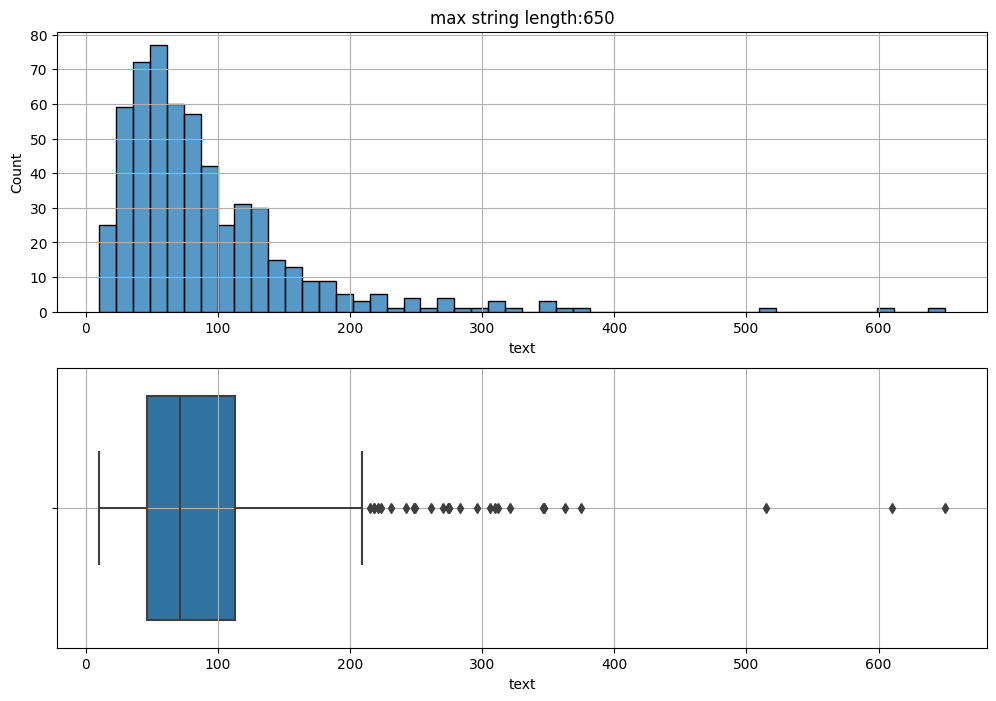

------------------------------------------------------------------------------------------------------------------------


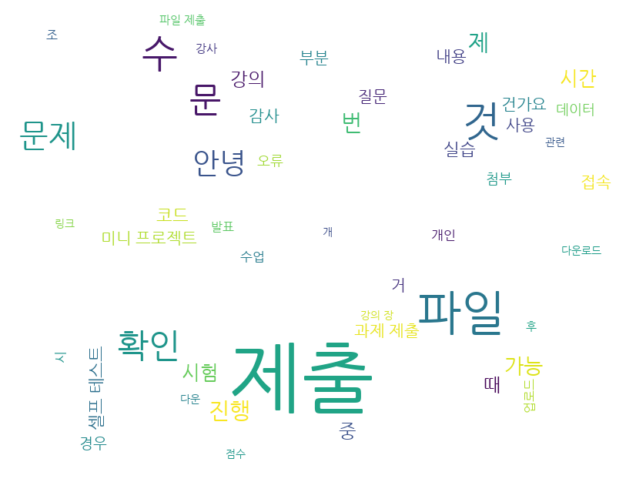

************************************************************************************************************************


'유형:원격'

0    말씀하신대로 하였으나, 이번에는 이런 오류가 발생합니다.\n\ncannot impo...
1                  어떻게 삭제하는지 모르겠어요 ㅜ 원격지원 부탁드려도 될까요.. 
2    마지막으로 안내해주신 명령어대로 수행해봤는데 역시 에러메시지가 뜹니다 ㅠㅠ\n혹시 ...
3    https://113366.com?accessCode=107144링크로 접속 후 프...
4    네트워크 오류 관련 알려주신 내용 확인해 봤는데 안됩니다,,,, 원격 부탁드려도 되...
5    튜터님,\n\n말씀해주신 urls.py 부분 해결하였습니다. 감사합니다.\n\n하지...
6                                   원격제어를 추가하는 것이 안됩니다
7                       1대1 원격조종으로 문제 해결 위해 남겨둔 질문입니다.
8    강사님께서 프로그램 다 종료하고 다시 가이드대로 해보라고 하셨는데도 계속 버츄얼 네...
9                        안녕하세요 깃허브 등록이안되서 원격제어 부탁드립니다.
Name: text, dtype: object

count                                                   100
unique                                                  100
top       말씀하신대로 하였으나, 이번에는 이런 오류가 발생합니다.\n\ncannot impo...
freq                                                      1
Name: text, dtype: object

,count,mean,std,min,25%,50%,75%,max
text,100.0,84.02,86.997037,9.0,39.75,58.0,104.25,683.0


------------------------------------------------------------------------------------------------------------------------
최대길이: 튜터님,

말씀해주신 urls.py 부분 해결하였습니다. 감사합니다.

하지만 아래 코드 실행시 또다른 에러가 발생합니다.
- C:\dev\mini_pro7&gt;python manage.py migrate
- C:\dev\mini_pro7&gt;python manage.py runserver

에러내용은 아래와 같습니다.
- OSError: [WinError 123] 파일 이름, 디렉터리 이름 또는 볼륨 레이블 구문이 잘못 
되었습니다: ''
- ModuleNotFoundError: No module named 'reference.urls'

문제 해결을 위해 https://bladewalker.tistory.com/713와 https://stackoverflow.com/questions/58873810/django-runserver-error-frozen-importlib-bootstrap를 참조하여
-  pip install --upgrade reference
- C:\dev\mini_pro7&gt;python manage.py makemigrations
코드를 실행하였으나 지속적으로 또다른 오류가 발생합니다.

---

다른 팀원분들께 여쭤보니 파이썬을 다시 삭제후 재설치를 권유하던데, 혹시 삭제후 재설치를 해야 할까요?
번거로우시겠지만, 원격으로 가상환경 세팅 도와주시면 정말 감사드리겠습니다.

최소길이: 원격 부탁드립니다


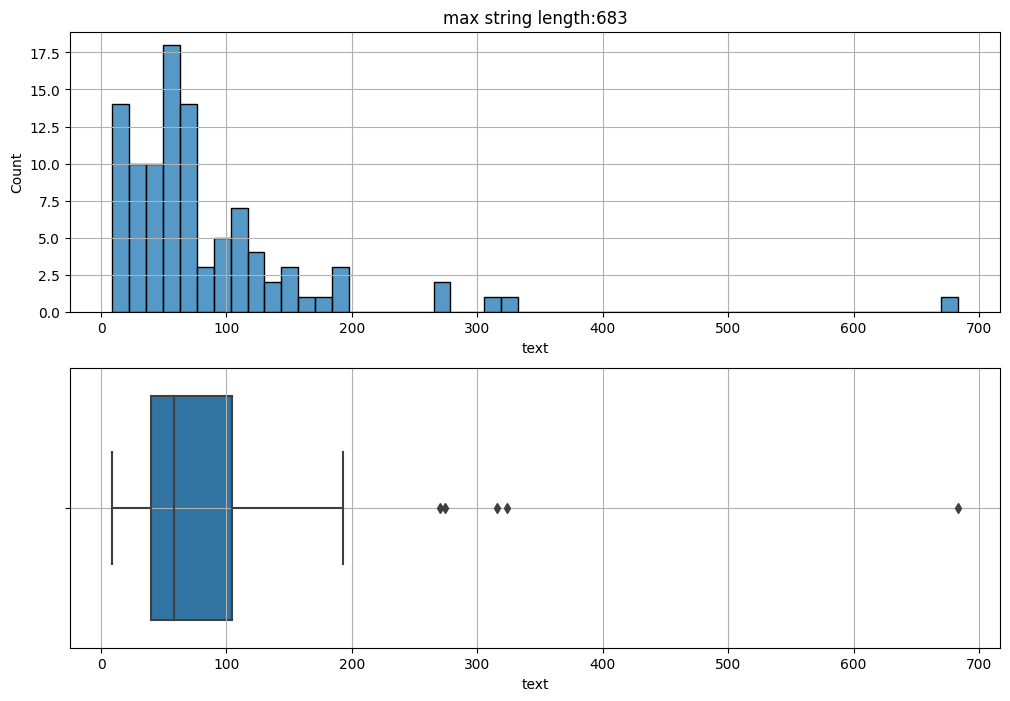

------------------------------------------------------------------------------------------------------------------------


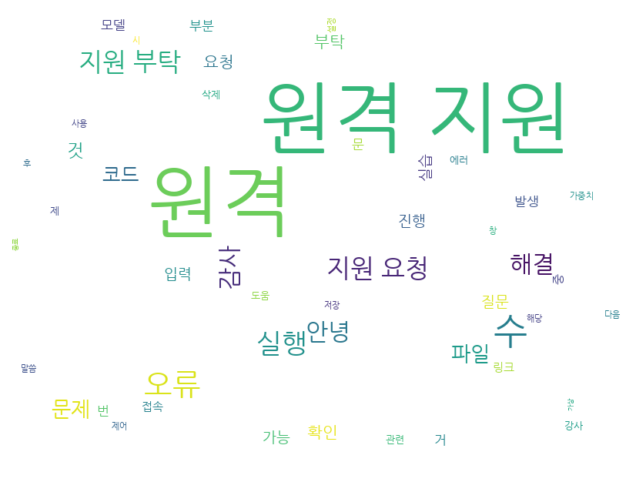

************************************************************************************************************************


'유형:웹'

0    현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...
1    PDF파일을 보시면 7페이지에 제안사 인프라는 3Tier로 구성(WEB/WAS/DB...
2    다시 쳐보기도 하면 오타 확인했지만 오타는 없었습니다. 그리고 해당 index파일도...
3    윈도우 프롬프트에서 작업중 cd Downloads 이후 퍼블릭 DNS를 연결하면 e...
4    아니면 혹시 인스턴스가 종료되었는데 삭제하기가 보이지가 않아서 새로운 인스턴스를 만...
5    두번째로 주신 OneDrive에 window10.ova파일이 아직 업로드 되지 않은...
6    google sheet의 제  master IP를 찾아 복사한 뒤 인스턴스 목록에서...
7    라우팅 테이블 설정에서 프라이빗서브넷이 퍼블릭 라우팅 테이블로 설정을 하였습니다.\...
8    강사님이 주신 참조자료 보면서 만들고 있습니다.\nhttps://findwork.d...
9    아까 rows에서 s빼먹어서 넣고 다시 돌려봤을때는 분명 열 저체가 다 나왔었거든요...
Name: text, dtype: object

count                                                   732
unique                                                  732
top       현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...
freq                                                      1
Name: text, dtype: object

,count,mean,std,min,25%,50%,75%,max
text,732.0,184.84153,448.83214,13.0,60.0,101.0,172.0,5690.0


------------------------------------------------------------------------------------------------------------------------
최대길이: $ python manage.py createsuperuser

You have 18 unapplied migration(s). Your project may not work properly until you apply the migrations for app(s): admin, auth, contenttypes, sessions.
Run 'python manage.py migrate' to apply them.
Traceback (most recent call last):
  File "C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\django\db\backends\utils.py", line 84, in _execute
    return self.cursor.execute(sql, params)
  File "C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\django\db\backends\mysql\base.py", line 73, in execute
    return self.cursor.execute(query, args)
  File "C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\MySQLdb\cursors.py", line 206, in execute
    res = self._query(query)
  File "C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\MySQLdb\cursors.py", lin

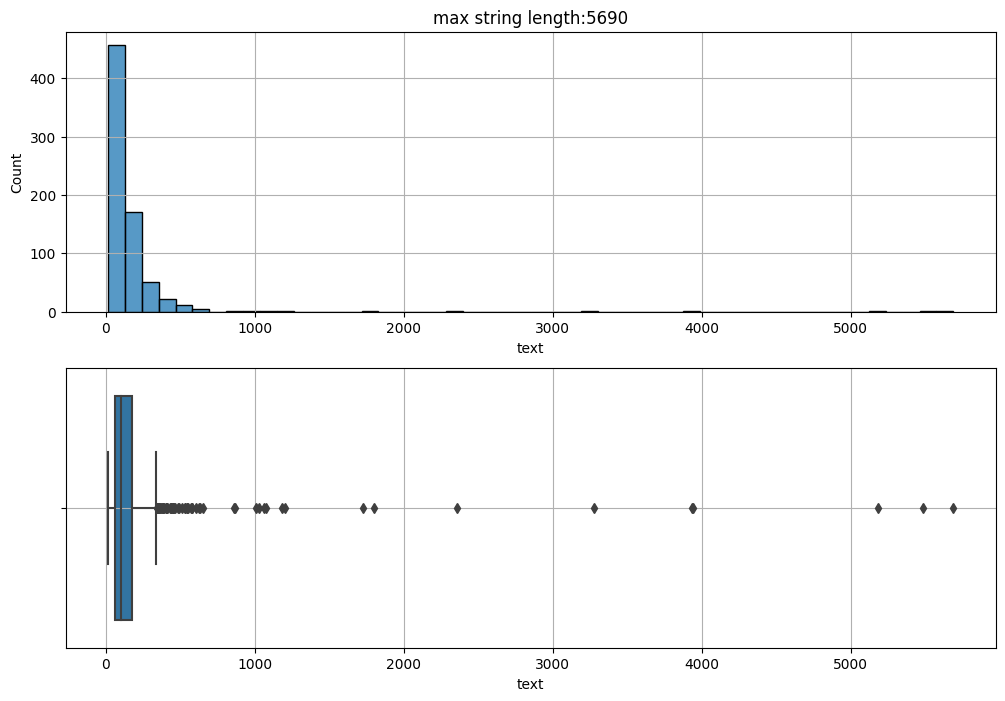

------------------------------------------------------------------------------------------------------------------------


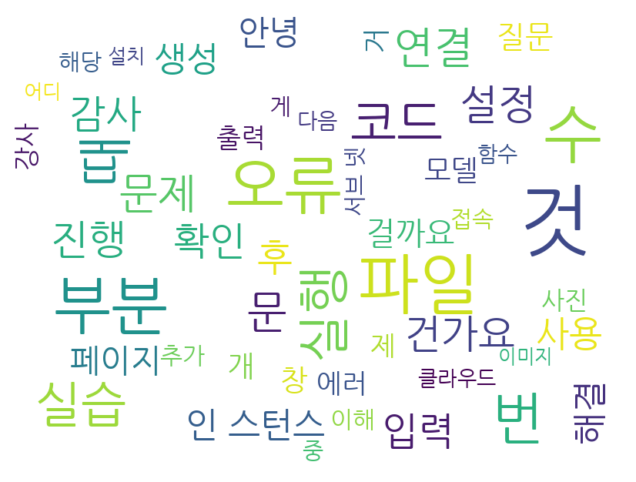

************************************************************************************************************************


'유형:이론'

0    저는 헬스케어, 그중에서도 정신건강에 대해 관심이 많습니다. 디지털 치료제와 관련한...
1    범주형 데이터와 숫자형 데이터 설명해주신 내용 잘 읽었습니다. 계속 읽고 적응해나아...
2    안녕하세요.\n\n실습1 제출합니다.\n피드백 부탁드립니다.\n\n+) 추가로, 저...
3    아이피 중에 13.13.12.2와 13.13.23.2가 없는데 어떤 것을 연결하는건...
4    backbone은 기본 골자이고, head는 backbone을 바탕으로 목적에 맞게...
5    3. IDF가 높다는 것은 적은 수의 문서에서 나타난다는 뜻이므로 그 단어가 그 문...
6    [실습4]\n\n쿠팡의 경우 유통업이지만 오픈마켓으로도 분류할 수가 있는데 제가 작...
7    도메인 관련 논문 검색 후 유의미한 feature 1차로 추려내서 데이터 전처리하는...
8    변수와 타겟간 가설수립을 할 때 변수간 관계를 이용해 변수를 추가해서 사용해도 될까...
9    이동인구 : 추정 합산값으로 소수점 표출, 개인정보 비식별화를 위해 3명 미만의 경...
Name: text, dtype: object

count                                                   728
unique                                                  728
top       저는 헬스케어, 그중에서도 정신건강에 대해 관심이 많습니다. 디지털 치료제와 관련한...
freq                                                      1
Name: text, dtype: object

,count,mean,std,min,25%,50%,75%,max
text,728.0,138.668956,101.730658,13.0,71.0,110.0,178.25,915.0


------------------------------------------------------------------------------------------------------------------------
최대길이: 수업에서 cacoo랑 packet tracer를 배우는 이유가

1. IT 인프라 구조에 대해서 이해해보는 시간
- 비록 직접 인프라를 구축 및 설계는 하지 않을지라도 어떻게 구성되어 있고 어떻게 돌아가는지는 알아보자.
적절한 비유일지는 모르겠으나, 운전을 하는 게 목표라고 할 때, 
우리가 자동차를 직접 설계하고 만들지는 않아도 자동차가 연료를 연소시키면서 엔진에 동력을 전달해서 그 힘으로 움직인다. 라는 식으로 원리와 과정을 아는 것과 같은 맥락...이려나요?

2. (DX과정이므로 DX 컨설턴트 및 관련 직무를 위한 교육이라고 가정할 때) DX 관련 업무에서 실제로 IT 인프라를 구축해야하는 경우가 있으며, 이 때 실제 장비를 가지고 하나씩 연결해보고 시도해보기에는 물리적(시간, 돈, 장소 등)제약이 있으므로 가상으로 해본다.

3. 적절한 비유일지는 모르겠으나...
수학에서 미적분을 배우는 게 최종 목표라고 했을 때, 처음부터 미적분을 학습시킬 수 없으니 그 기초가 되는 수열, 수열의 극한, 함수의 극한 순으로 배우듯이 DX 컨설턴트 과정에서 기초라 할 수 있는 IT 인프라를 학습하는 과정에 있는 것이다.

상기한 3가지 이유인가요?

이전까지 계속 코딩과 데이터 전처리 및 분석으로 달려오다가 갑자기 가상 세계 속에서 무언가를 구성해보기도 하고, 도식화 해보기도 하니 순간 이걸 배우는 목적이 무엇인가? 라고 했을 때 말문이 막혀서 한번 질문 드렸습니다.

훌륭한 커리큘럼을 구성한 교육과정에서 배우는 입장에서 이러한 의문을 가지는 게 터무니 없을 수도 있으나 목적의식과 목표에 대해서 알면 무엇을 좀 더 중점적으로 학습해야 할지 알 수 있을 거 같아서 문의드립니다. ^^:

추가적으로 혹시 실례가 안 된다면 실무에서 cacoo와 ci

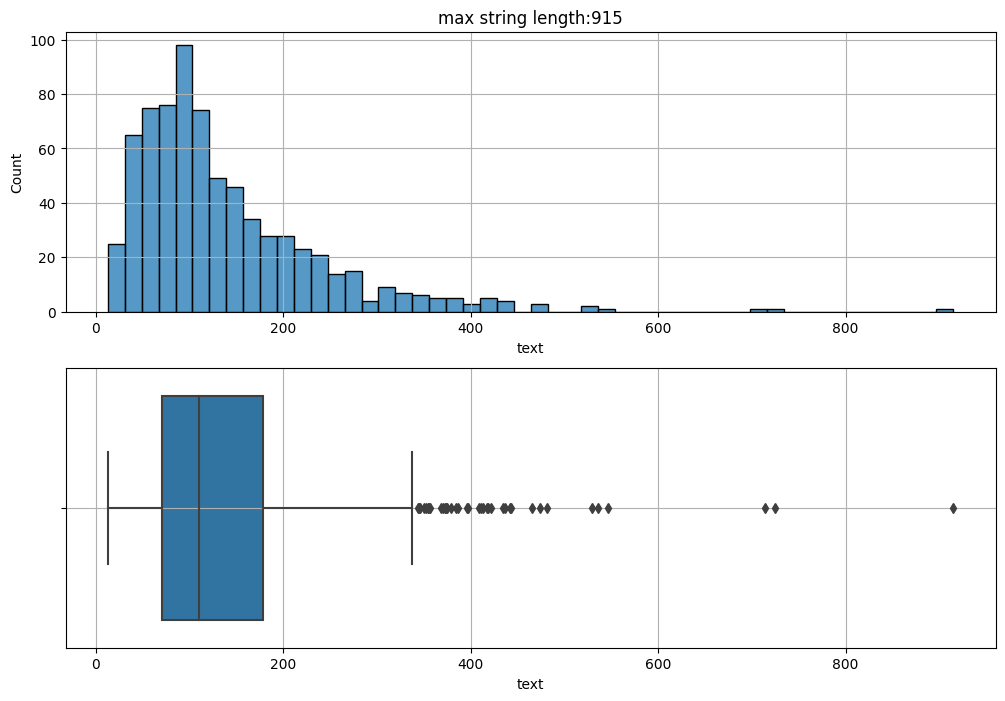

------------------------------------------------------------------------------------------------------------------------


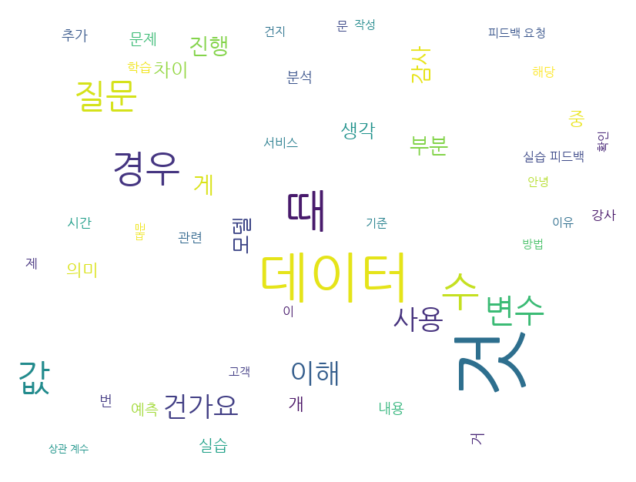

************************************************************************************************************************


'유형:코드1'

0    첨부파일에 3375.번에 대해 정답인 코드로 돌렸을 시 다 패스가 출력되었지만 문제...
1    앗...제가 질문을 잘못드려서 혼란이 있으셨을 듯 합니다 죄송합니다...ㅠ\n원질문...
2    제가 All Failed를 말씀드린건.. 실행에는 아무문제가 없기 때문입니다...\...
3    안녕하세요! 3436번. 슬라이딩 퍼즐 문제 관련하여 질문드립니다.\n우선 3줄에 ...
4    안녕하세요, 답변에 감사드립니다. 3389 커트라인 정하기 추가 문의 드립니다. \...
5    52 54 55번은 모두 3360번 문제입니다..\n\n추가로 반복문 안에 조건문이...
6    안녕하세요 3417. 오리 농법 예제 입력 1의 예제 출력 1에 대해 질문 드립니다...
7    함수 say_hey를 만들어 보세요.\n횟수를 받는 입력 매개변수 count(숫자)...
8    w =int(input("수도사용량:"))\nb= input('회사명:')\ndef...
9    파이썬을 이번에 처음 배우게 되었습니다. 코딩마스터즈 테스트에서\n\nfrom sy...
Name: text, dtype: object

count                                                   488
unique                                                  488
top       첨부파일에 3375.번에 대해 정답인 코드로 돌렸을 시 다 패스가 출력되었지만 문제...
freq                                                      1
Name: text, dtype: object

,count,mean,std,min,25%,50%,75%,max
text,488.0,333.356557,316.485935,12.0,124.0,242.5,414.0,2655.0


------------------------------------------------------------------------------------------------------------------------
최대길이: import collections
import re
a=list(input()) # 반복시킬 문자열 받기
b= input() # 목적
c=0 # 반복 횟수
y = [] # 반복할 문자열 갯수 
f = str(a[0]+'+'+a[1]+'+'+a[2]+'+') 

z = re.findall(f, b) 
z = list(str(z)) # z는 반복 대상 문자열
for i in z:
    if i in a:
        y.append(i)   # z중 '' ','등 불필요 문자 제거, 
        
if a[0]==a[1]==a[2]: # 반복시킬 문자열이 모두 같을 때
    d1=collections.Counter(a) # a 문자열 갯수
    d2=collections.Counter(y) # y 문자열 갯수
    while True:
        if d2-d1!=collections.Counter(): # a의 모든 문자가 반복대상 문자보다 수가 적을 때
            a=a*2 # a문자열 반복
            c+=1 # 반복횟수 추가
            d1=collections.Counter(a) # 
            continue
        if d2-d1==collections.Counter(): # a의 모든 문자가 반복대상 문자보다 수가 크거나 같을 때
            print(c)
            break                   
        
elif (a[0]!=a[2]) & (a[0] == a[1]): # AAB와 같은 경우
    d1=collections.Counter(a)
    d2=collections.Counter(y)
    while Tr

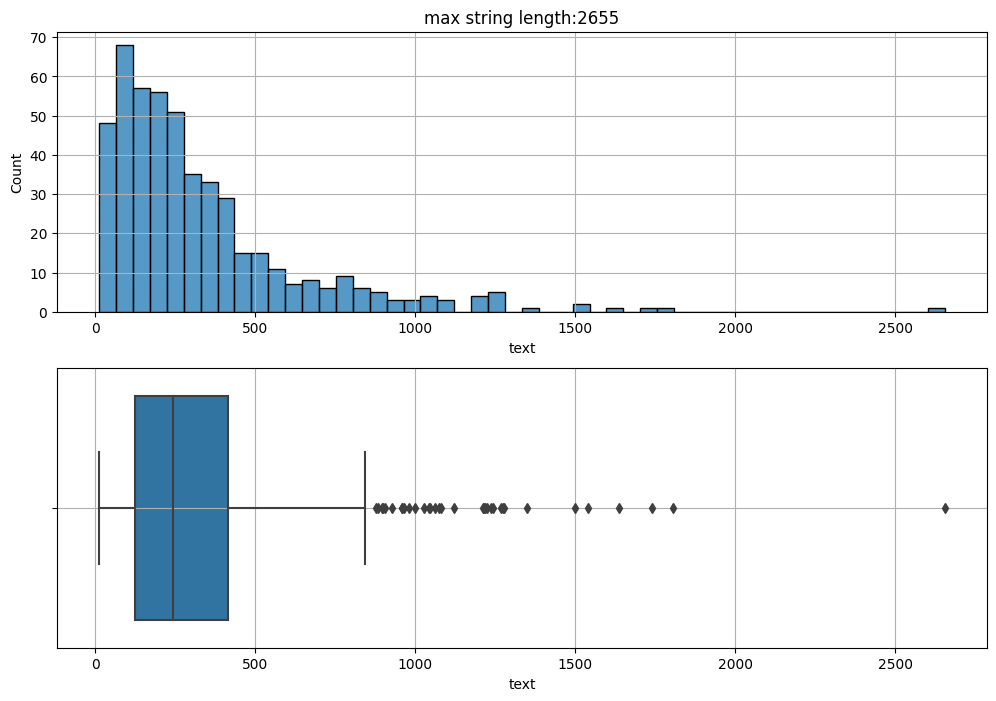

------------------------------------------------------------------------------------------------------------------------


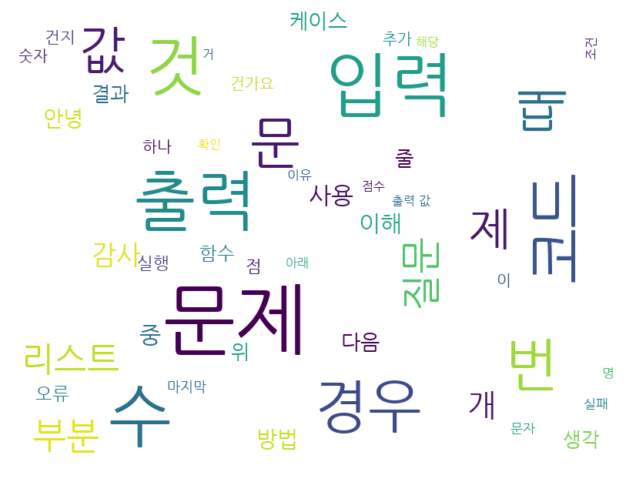

************************************************************************************************************************


'유형:코드2'

0    self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...
1    glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...
2    tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...
3    filename = TEST_IMAGE + str(round(frame_sec)) ...
4    만약\n각각 결측치가 하나씩 있는 경우를 제외하고\nOzone  열에도 Solar....
5    궁금한 사항은 다음과 같습니다.\n1) data에 있는 연속형 변수 A,B가 존재한...
6    model.predict() 에서 \n'float' object cannot be ...
7    x_train = scaler.fit_transform(x_train) \nx_va...
8    train_x,train_y= train_test_split(df_total,tes...
9    모델 학습 시 아래와 같은 error 메세지가 나와서 어떻게 해결해야 할지 문의 드...
Name: text, dtype: object

count                                                  1097
unique                                                 1097
top       self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...
freq                                                      1
Name: text, dtype: object

,count,mean,std,min,25%,50%,75%,max
text,1097.0,261.750228,398.162267,13.0,90.0,158.0,285.0,6012.0


------------------------------------------------------------------------------------------------------------------------
최대길이: sns.kdeplot(x = td[var])
plt.show()

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
 in 
----&gt; 1 sns.kdeplot(x = td[var])
      2 plt.show()

~\anaconda3\lib\site-packages\seaborn\_decorators.py in inner_f(*args, **kwargs)
     44             )
     45         kwargs.update({k: arg for k, arg in zip(sig.parameters, args)})
---&gt; 46         return f(**kwargs)
     47     return inner_f
     48 

~\anaconda3\lib\site-packages\seaborn\distributions.py in kdeplot(x, y, shade, vertical, kernel, bw, gridsize, cut, clip, legend, cumulative, shade_lowest, cbar, cbar_ax, cbar_kws, ax, weights, hue, palette, hue_order, hue_norm, multiple, common_norm, common_grid, levels, thresh, bw_method, bw_adjust, log_scale, color, fill, data, data2, warn_singular, **kwargs)


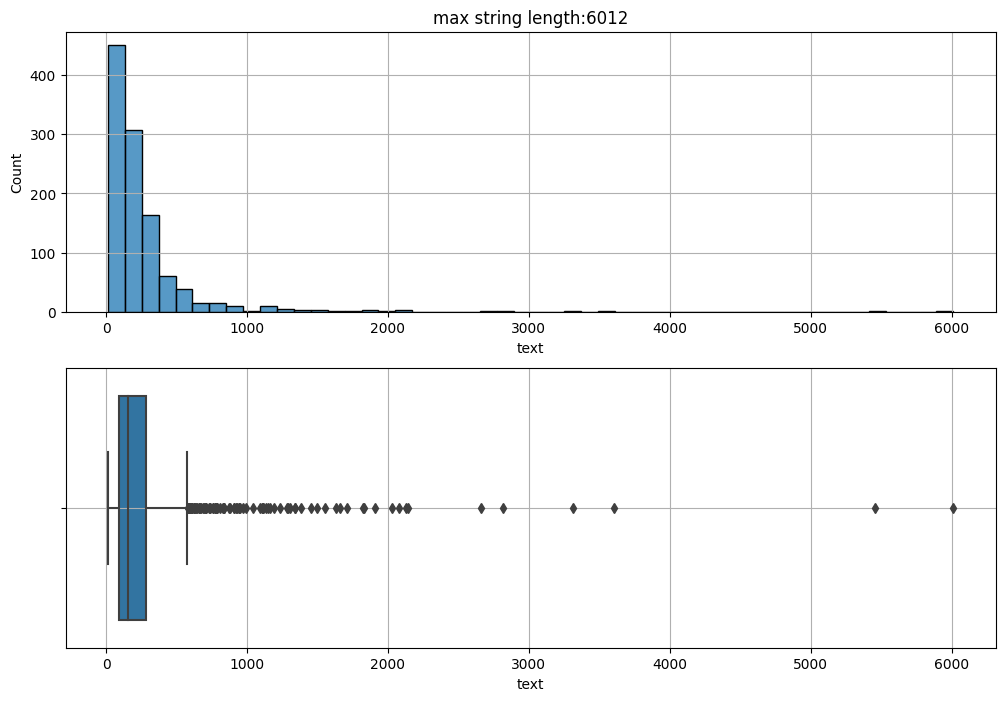

------------------------------------------------------------------------------------------------------------------------


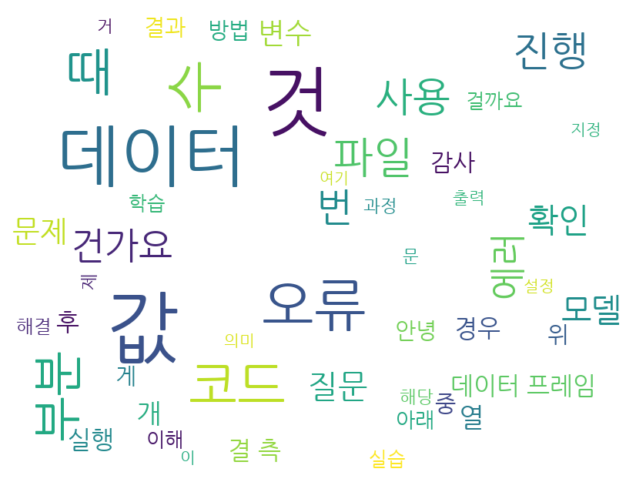

In [ ]:
for label in sorted(train_df.label.unique()):
        text_analysis(train_df,label)

# 단계2 : 데이터 전처리
> * Tokenization(Konlpy...)
> * Vectorization(N-grams, Sequence)
> * [Google guide](https://developers.google.com/machine-learning/guides/text-classification/step-3)

## 5. 데이터 준비
### 5-1. label 아래 형식으로 처리
```python
label_dict = {
    '코드1': 0,
    '코드2': 0,
    '웹': 1,
    '이론': 2,
    '시스템 운영': 3,
    '원격': 4
}
```

In [ ]:
label_dict = {
    '코드1': 0,
    '코드2': 0,
    '웹': 1,
    '이론': 2,
    '시스템 운영': 3,
    '원격': 4
}
preprocessed_df = train_df.replace({'label':label_dict}).copy()

In [ ]:
preprocessed_df

,text,label
0,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",0
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,1
2,glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...,0
3,"tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...",0
4,filename = TEST_IMAGE + str(round(frame_sec)) ...,0
...,...,...
3701,"토큰화 이후 train val 를 분리하고 각 train set, val set에 ...",0
3702,올린 값들 중 최고점인 건가요? 아니면 최근에 올린 파일로 무조건 갱신인가요?\n최...,3
3703,수업에서 cacoo랑 packet tracer를 배우는 이유가\n\n1. IT 인프...,2
3704,inplace =True 해도 값이 변경이 안되고 none으로 뜹니다. 혹시 원격지...,4


In [ ]:
pd = train

In [ ]:
pd['label'] = pd['label'].replace('코드1',0).replace('코드2',0).replace('웹',1).replace('이론',2).replace('시스템 운영',3).replace('원격',4)

In [ ]:
train.head()

,text,label
0,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",0
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,1
2,glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...,0
3,"tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...",0
4,filename = TEST_IMAGE + str(round(frame_sec)) ...,0


In [ ]:
train_pd.head()

,text,label
0,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",코드2
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,웹
2,glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...,코드2
3,"tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...",코드2
4,filename = TEST_IMAGE + str(round(frame_sec)) ...,코드2


In [ ]:
pd.head()

,text,label
0,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",0
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,1
2,glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...,0
3,"tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...",0
4,filename = TEST_IMAGE + str(round(frame_sec)) ...,0


### 5-2. Train Validation split

In [ ]:
# x = preprocessed_df['text']
# y = preprocessed_df['label']
# # x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=2023)

In [ ]:
# x = train['text']
# y = train['label']

from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(preprocessed_df, test_size=0.2, random_state=2023, stratify=preprocessed_df['label'])
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)
train_data.shape, test_data.shape

((2964, 2), (742, 2))

In [ ]:
test_data.head()

,text,label
0,class Profile(models.Model):\n User = model...,1
1,#2-3에서 WindowSearch.exe 를 치고나면\nThe system can...,1
2,"수업시간에 배운 머신러닝 모델의 종류는 \n\nlinear regression, l...",2
3,"안녕하세요.\nx,y_train, val 나누고 CNN 설계 쪽으로 진행을 하면 되...",0
4,튜토리얼 실습 때 filename = TUTORIAL_IMAGE + '/' + st...,0


In [ ]:
train_data.head()

,text,label
0,"안녕하세요 질문드립니다!\n\nstu01 = {\n 'no': 1,\n ...",0
1,# 5) 검증 : 예측\npl = ml.predict(x_val)\npl\n\npl...,2
2,지금 현재 문자열에서 float으로 변환 하는 것은 불가능으로 보입니다. 총 생활...,2
3,kubeadm join 제꺼 복붙하고 \n입력했는데 저렇게 중간에 잘리고 -bash...,1
4,수치화 과정에서 Age 열에 결측치가 있어 결측치를 제거했더니(첨부파일: 수치화-1...,0


In [ ]:
x_train = train_data['text'].astype('str').tolist()
x_test = test_data['text'].astype('str').tolist()
y_train = train_data['label'].values
y_test = test_data['label'].values

In [ ]:
x_train

["안녕하세요 질문드립니다!\n\nstu01 = {\n    'no': 1,\n    'name': '홍길동',\n    'score': [92, 96, 98]\n    'mean': 95.3333333\n}\n\nprint(f'학생 1의 평균 점수는 {stu01['mean']:.2f}입니다.')\n\n위와 같이 딕셔너리를 만들고 mean에 대하여 소수점 둘째자리까지 출력하려고 하는데\n위 print문과 같이 f-string을 이용해서 출력하면 안 되는 걸까요? 신택스 에러가 뜹니다. 감사합니다.",
 '# 5) 검증 : 예측\npl = ml.predict(x_val)\npl\n\npl_real = pl * (y_train.max() - y_train.min()) + y_train.min()\npl_real\n\n예측단계에서 pl_real이 실제 값이라고 하신것도 잘 이해가 안갑니다\n곡선자체가 강사님이랑 좀 다르게나온거같은데 뭔가 잘못한걸까요?',
 '지금 현재 문자열에서 float으로 변환 하는 것은 불가능으로 보입니다.  총 생활 인구수를 예측하기 위한 컬럼, 예측하기 위해서 만든 shift를 이용한 컬럼을 제외한 날짜 시간 컬럼은 지워도 되는 것으로 보입니다:)\n\nshift 열이 현재 int64[ns] 형식인데 얘도 지우고 기준일 ID도 다 지우라는 말씀이시죠?',
 'kubeadm join 제꺼 복붙하고 \n입력했는데 저렇게 중간에 잘리고 -bash: kubeadm: No such file or directory 뜨고 저런 상태가 되었는데 어떻게 하나요?',
 '수치화 과정에서 Age 열에 결측치가 있어 결측치를 제거했더니(첨부파일: 수치화-1) 강사님의 결과(첨부파일: 수치화-2)와 다르게 나왔습니다. 결측치를 제거해주지 않고 실행하면 NaN으로 결과값이 나옵니다.\n어떻게 해결해야 하는지 도움 부탁드립니다.',
 '안녕하세요. 항상 자세한 답변을 주셔서 감사드립니다.\n오늘 교재 다운로드(pdf)가 안되네요\n다운로드 버튼을 눌러도 반응이 없는

## 6. 데이터 처리

### 6-1. 특수문자 제거(Optional)
- [정규표현식 이용](https://docs.python.org/3/howto/regex.html)

In [ ]:
noun_list = []
for text in train['text']:
    noun_list.extend(mecab.nouns(text))

In [ ]:
korean_stopwords_path = "/content/drive/MyDrive/2023.04.03_미니프로젝트4차_실습자료/txt.txt"

# 텍스트 파일을 오픈합니다.
with open(korean_stopwords_path, encoding='utf-8') as f:
	stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]

In [ ]:
# 불용어 데이터를 제거합니다.
X_train=[]
for sentence in noun_list:
    temp_X = []
    temp_X=okt.morphs(sentence, stem=True) # 토큰화
    temp_X=[word for word in temp_X if not word in stopwords] # 불용어 제거
    X_train.append(temp_X)

In [ ]:
X_train

[[],
 ['커널'],
 ['사이즈'],
 ['은'],
 ['단어'],
 ['최대'],
 ['길이'],
 ['가정'],
 ['선언'],
 [],
 ['이미지'],
 ['개'],
 ['업로드'],
 ['자바'],
 ['스크립트'],
 ['동', '적'],
 ['폼'],
 ['개'],
 ['생', '성'],
 ['데'],
 ['클릭'],
 ['뭘'],
 ['수'],
 ['기본'],
 ['예제'],
 ['코드'],
 ['이유'],
 ['뭘', '끄다'],
 ['사용'],
 [],
 ['질문'],
 ['포함'],
 ['작동'],
 [],
 ['질문'],
 ['제공'],
 ['파일'],
 ['폴더'],
 ['포함'],
 ['폴더'],
 ['안'],
 ['정상'],
 ['작동'],
 ['오류'],
 ['해결'],
 ['안'],
 ['폴더'],
 ['안'],
 ['이미지'],
 ['저장'],
 ['걸'],
 ['이해'],
 ['실행'],
 ['폴더'],
 ['이미지'],
 ['저장'],
 ['질문'],
 [],
 ['헬스'],
 ['중'],
 ['정신'],
 ['건강'],
 ['관심'],
 ['디지털'],
 ['치료'],
 ['관련'],
 ['서비스'],
 ['기획'],
 ['기업'],
 ['프로젝트'],
 ['희망'],
 ['보건복지부'],
 ['정신'],
 ['건강'],
 ['관련'],
 ['포털'],
 ['운영'],
 [],
 ['중심'],
 ['문제'],
 ['정의'],
 ['파일'],
 ['페이지'],
 [],
 ['알다'],
 ['인프라'],
 ['구성'],
 ['웹'],
 ['서버'],
 ['솔루션'],
 ['대다'],
 ['통합'],
 ['제시'],
 [],
 ['배치도'],
 ['작성'],
 ['이중화'],
 ['표현'],
 ['작성'],
 ['대로'],
 ['통합'],
 ['배치'],
 ['걸다', '요'],
 ['범주'],
 ['데이터'],
 ['숫자'],
 ['데이터'],
 ['설명'],
 ['내용'],
 ['적응'],
 ['아래'],
 ['첨부']

### 6-2. N-grams (sklearn)

1.   항목 추가

1.   항목 추가
2.   항목 추가


2.   항목 추가


> * [scikit-learn working with text data](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html#)
> * [scikit-learn text feature extraction](https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction)
> * [한글 자료](https://datascienceschool.net/03%20machine%20learning/03.01.03%20Scikit-Learn%EC%9D%98%20%EB%AC%B8%EC%84%9C%20%EC%A0%84%EC%B2%98%EB%A6%AC%20%EA%B8%B0%EB%8A%A5.html)

In [ ]:
# words = text.split()                 # 공백을 기준으로 문자열을 분리하여 리스트로 만듦
 
# for i in range(len(words) - 1):      # 2-gram이므로 리스트의 마지막에서 요소 한 개 앞까지만 반복함
#     print(words[i], words[i + 1]) 

### 6-3. Sequence (keras, whatever)
> * [keras text classification](https://keras.io/examples/nlp/text_classification_from_scratch/)
> * [tensorflow text classification](https://www.tensorflow.org/tutorials/keras/text_classification)
* tokenizer.fit_on_texts() : 주어진 텍스트 데이터에 대해 단어 사전 생성
* 문장 길이 분포 살펴보기
* 문장 길이를 구해서 기초통계량, histogram, boxplot을 그려보고 적절한 개수를 결정합니다.
* tokenizer.texts_to_sequences() : 주어진 텍스트 데이터를 정수 시퀀스로 변환

In [ ]:
X_train = train_pd['text'].astype('str').tolist()


NameError: ignored

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
max_words = 600   # 상위 35,000개의 단어만 보존
tokenizer = Tokenizer(num_words=max_words, lower=False) 

In [ ]:
%%time     
# 실행시간측정
tokenizer.fit_on_texts( X_train )                       # tokenize token:idx
x_train = tokenizer.texts_to_sequences(x_train)         # textseq > idxseq
x_test = tokenizer.texts_to_sequences(x_test)

CPU times: user 909 ms, sys: 9.64 ms, total: 919 ms
Wall time: 903 ms


In [ ]:
max_words = max_words ## 위에서 설정하길 35000
embedding_dim = 128 ## 단어 embedding 차원
max_len = 30 ## 문장 최대 길이

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
x_train = pad_sequences(x_train, maxlen = max_len)      # 문장길이 통일
x_test = pad_sequences(x_test, maxlen = max_len)

In [ ]:
x_train[:6]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  30,
        196,   2,  20, 190,  15, 516, 111, 276,  82, 111, 504, 104, 203,
        334, 127, 134,  48],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  63, 152,  16, 387,  42,  41, 245,  42,  41, 310,  42,  41,
        310, 435,  78, 254],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 383, 228, 327, 157, 591, 446, 409,
        203, 423, 228, 202],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        405, 265,  28, 229],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 388, 518,   2,  51,   8, 460, 432, 298,
         28, 519, 375, 204],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,

In [ ]:
train_data.iloc[2]

text     지금 현재 문자열에서 float으로 변환 하는 것은 불가능으로 보입니다.  총 생활...
label                                                    2
Name: 2, dtype: object

In [ ]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [ ]:
not0train_idx = x_train.sum(1) > 0
not0test_idx = x_test.sum(1) > 0

train_data = train_data.loc[not0train_idx].reset_index(drop=True)
test_data = test_data.loc[not0test_idx].reset_index(drop=True)

x_train = x_train[not0train_idx]
y_train = y_train[not0train_idx]

x_test = x_test[not0test_idx]
y_test = y_test[not0test_idx]

### 6-4. Word2Vec (gensim, optional) 
> * [gensim-word2vec-tutorial](https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html#sphx-glr-auto-examples-tutorials-run-word2vec-py)
> * [tensorflow-word2vec-tutorial](https://www.tensorflow.org/tutorials/text/word2vec?hl=ko)

In [ ]:
# 아래 함수는 제공합니다.
def get_sent_embeddings(model, embedding_size, tokenized_words):

    # 단어 임베딩 및 n_words의 크기가 0인 feature_vec 배열을 0으로 초기화합니다. 
    # 또한 model.wv.index2word를 사용하여 Word2Vec 모델의 어휘에 단어 세트를 생성합니다.
    feature_vec = np.zeros((embedding_size,), dtype='float32')
    n_words = 0
    index2word_set = set(model.wv.index_to_key)

    # 토큰화된 문장의 각 단어를 반복하고 Word2Vec 모델의 어휘에 존재하는지 확인합니다. 
    # 그렇다면 n_words가 증가하고 단어의 임베딩이 feature_vec에 추가됩니다.
    for word in tokenized_words:
        if word in index2word_set:
            n_words += 1
            feature_vec = np.add(feature_vec, model.wv[word])
    
    # Word2Vec 모델의 어휘에 있는 입력 문장에 단어가 있는지 확인합니다. 
    # 있다면 feature_vec를 n_words로 나누어 입력 문장의 평균 임베딩을 구합니다.
    if (n_words > 0):
        feature_vec = np.divide(feature_vec, n_words)
        
    return feature_vec
def get_dataset(sentences, model, num_features):

    # 각 문장에 대한 임베딩을 보유할 dataset이라는 빈 목록을 초기화합니다.
    dataset = list()

    # 문장의 각 문장을 반복하고 앞에서 설명한 get_sent_embeddings() 함수를 사용하여 문장에 대한 평균 임베딩을 생성합니다. 
    # 결과 문장 임베딩이 데이터 세트 목록에 추가됩니다.
    for sent in sentences:
        dataset.append(get_sent_embeddings(model, num_features, sent))

    # 루프에서 생성된 문장 임베딩을 sent_embedding_vectors라는 2차원 배열에 쌓습니다. 
    sent_embedding_vectors = np.stack(dataset)
    
    return sent_embedding_vectors

In [ ]:
get_sent_embeddings(   )

AttributeError: ignored

### 6-5. 데이터 저장하기
* N-gram, Sequence로 처리한 데이터 저장
* sparse data에 대해서는 scipy.sparse.save_npz 활용

In [ ]:
train.to_csv('df.csv')
df.to_csv('df.csv')
df.to_csv('df.csv')
df.to_csv('df.csv')


In [ ]:
train_= [text for text in preprocessed_df['text'] if type(text) is str]
train_

['self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, (K, 100)) for K in Ks])\n1. 여기서 커널사이즈 K,100 은 한 단어의 최대 길이가 100이 넘지않는다는 가정으로 그냥 100으로 선언한 것인지 궁금합니다.',
 '현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데 클릭해도 생성이 안되네요... 막혀서 뭘 할 수가 없네요.. 혹시나 해서 기본 예제코드로만 간단히 돌려도 안됩니다. 이유가 뭘까요',
 'glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 포함되면 제대로 작동하지 않는 것 같아 질문 드립니다.\n\n제공해주신 파일에 AIVLE_3rd[Team] 폴더가 포함되어 있는데, 이 폴더 안에는 glob이 정상적으로 작동하지 않습니다.',
 "tmpp = tmp.groupby(by = 'Addr1', as_index=False)[['Category']].sum()\n\n\nplt.figure(figsize=(15, 5))\nplt.bar(tmpp['Addr1'], tmpp['Category']/1000)\nplt.ticklabel_format(axis='y', style='plain')\nplt.show()\n\n\n오류 : unsupported operand type(s) for /: 'str' and 'int'\n\n어떻게 해결하면 좋을까요?!!!!",
 'filename = TEST_IMAGE + str(round(frame_sec)) + ".jpg"\n\n이렇게 하면 test_path 안에 image 폴더 안에 이미지들이 저장 되는걸로 이해했는데\n\n이렇게 실행하니 test 폴더에 이미지가 저장되어서 질문드립니다',
 '저는 헬스케어, 그중에서도 정신건강에 대해 관심이 많습니다. 디지털 치료제와 관련한 서비스를 기획하는 기업이나 프로젝트를 희망하고 있습니다. 보건복지부에서 정신건강 관련하여 포털을 운영하고 있어서 이를 중심으로 문제

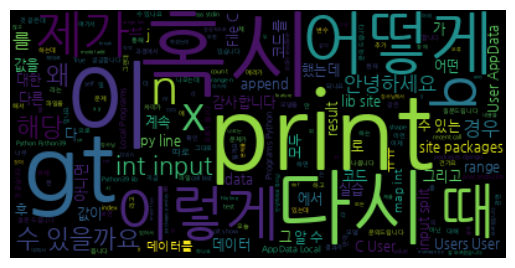

In [ ]:
wordcloud = WordCloud(font_path ="NanumGothic", relative_scaling = 0.3, background_color = 'black').generate(' '.join(train_))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
print('코드 갯수: {}'.format(train_data['label'].value_counts()[0]))
print('웹 갯수: {}'.format(train_data['label'].value_counts()[1]))
print('이론 갯수: {}'.format(train_data['label'].value_counts()[2]))
print('시스템 운영 갯수: {}'.format(train_data['label'].value_counts()[3]))
print('원격 갯수: {}'.format(train_data['label'].value_counts()[4]))

코드 갯수: 1268
웹 갯수: 585
이론 갯수: 582
시스템 운영 갯수: 449
원격 갯수: 80


In [ ]:
print('코드 갯수: {}'.format(test_data['label'].value_counts()[0]))
print('웹 갯수: {}'.format(test_data['label'].value_counts()[1]))
print('이론 갯수: {}'.format(test_data['label'].value_counts()[2]))
print('시스템 운영 갯수: {}'.format(test_data['label'].value_counts()[3]))
print('원격 갯수: {}'.format(test_data['label'].value_counts()[4]))

코드 갯수: 317
웹 갯수: 147
이론 갯수: 146
시스템 운영 갯수: 112
원격 갯수: 20


In [ ]:
import re
#전처리 함수 만들기
def preprocessing(text, mecab, remove_stopwords = False, stop_words =[]):
  #함수인자설명
  # review: 전처리할 텍스트
  # okt: okt객체를 반복적으로 생성하지 않고 미리 생성 후 인자로 받음
  # remove_stopword: 불용어를 제거할지 여부 선택. 기본값 False
  # stop_words: 불용어 사전은 사용자가 직접 입력, 기본값 빈 리스트

  # 1. 한글 및 공백 제외한 문자 모두 제거
  review_text = re.sub('[^0-9a-zA-Zㄱ-ㅣ가-힣]', '', text)
  
  #2. okt 객체를 활용하여 형태소 단어로 나눔
  word_review = mecab.nouns(review_text)

  if remove_stopwords:
    #3. 불용어 제거(선택)
    word_review = [token for token in word_review if not token in stop_words]
  return word_review

In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(preprocessed_df, test_size=0.2, random_state=2023, stratify=preprocessed_df['label'])
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)
train_data.shape, test_data.shape

((2964, 2), (742, 2))

In [ ]:
# 전체 텍스트 전처리
korean_stopwords_path = "/content/drive/MyDrive/2023.04.03_미니프로젝트4차_실습자료/txt.txt"

# 텍스트 파일을 오픈합니다.
with open(korean_stopwords_path, encoding='utf-8') as f:
	stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]
clean_train_review = []

for text in train_data['text']:
  # 리뷰가 문자열인 경우만 전처리 진행
  if type(text) == str:
    clean_train_review.append(preprocessing(text, mecab, remove_stopwords=True, stop_words= stopwords))
  else:
    clean_train_review.append([]) #str이 아닌 행은 빈칸으로 놔두기

#테스트 리뷰도 동일하게 전처리
clean_test_review = []
for text in test_data['text']:
  if type(text) == str:
    clean_test_review.append(preprocessing(text, mecab, remove_stopwords=True, stop_words=stopwords))
  else:
    clean_test_review.append([])

In [ ]:
clean_test_review

[['작성', '정상', '페이지', '설정', '후', '브라우저', '실행', '시', '작동', '프로그램', '테이블', '내용'],
 ['문구', '끝', '진행', '상황', '세션', '입력', '값', '문제', '실습', '파일', '코드', '복사', '방법'],
 ['수업',
  '머신',
  '러닝',
  '모델',
  '종류',
  '모델',
  '모델',
  '수',
  '기반',
  '모델',
  '적용',
  '가능',
  '건가요'],
 ['안녕',
  '설계',
  '쪽',
  '진행',
  '건가요',
  '모델링',
  '부분',
  '아래',
  '진행',
  '부분',
  '추가',
  '부분',
  '걸',
  '기입',
  '건지',
  '이해'],
 ['튜토리얼', '실습', '코드', '작성', '코드', '파일', '안', '이미지', '생성', '수', '건지'],
 ['안녕',
  '금요일',
  '시험',
  '오픈',
  '북',
  '형태',
  '시험',
  '설',
  '명회',
  '말씀',
  '아이패드',
  '이용',
  '수',
  '프린트',
  '수기',
  '작성',
  '이용',
  '수',
  '여문',
  '확인',
  '감사'],
 ['안녕',
  '전처리',
  '리뷰',
  '정도',
  '정리',
  '데이터',
  '추석',
  '교통',
  '소요',
  '예측',
  '벤트',
  '분',
  '코드',
  '전처리',
  '과정',
  '수',
  '방법',
  '발표'],
 ['확률',
  '추정',
  '밀도',
  '함수',
  '그래프',
  '범위',
  '신뢰',
  '수준',
  '이유',
  '대립가설',
  '유의미',
  '이하',
  '범위',
  '정규',
  '분포',
  '끝',
  '쪽',
  '면적',
  '예측',
  '가설',
  '점',
  '반대',
  '경우',
  '신뢰',
  '수준',
  '생각'],
 ['열', '포함', 

In [ ]:
# 인덱스 벡터 변환 후 일정 길이 넘어가거나 모자라는 리뷰 패딩처리
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_words = 20000  # 상위 40,000개의 단어만 보존

tokenizer = Tokenizer(num_words=max_words, lower=False)
tokenizer.fit_on_texts(clean_train_review)
train_sequences = tokenizer.texts_to_sequences(clean_train_review)
test_sequences = tokenizer.texts_to_sequences(clean_test_review)

word_vocab = tokenizer.word_index #단어사전형태
MAX_SEQUENCE_LENGTH = 40 #문장 최대 길이
embedding_dim = 128 ## 단어 embedding 지원. 단어 하나당 몇 개의 특징값을 학습할 것인가

#학습 데이터
train_inputs = pad_sequences(train_sequences,maxlen=MAX_SEQUENCE_LENGTH,padding='post')

#학습 데이터 라벨 벡터화
train_labels = np.array(train_data['label'])

#평가 데이터 
test_inputs = pad_sequences(test_sequences,maxlen=MAX_SEQUENCE_LENGTH,padding='post')
#평가 데이터 라벨 벡터화
test_labels = np.array(test_data['label'])

In [ ]:
train_inputs = np.array(train_inputs)
train_labels = np.array(train_labels)

In [ ]:
train_sequences

[[9,
  14,
  475,
  152,
  112,
  148,
  57,
  432,
  913,
  1036,
  311,
  23,
  509,
  2058,
  67,
  23,
  41,
  2059,
  31,
  11],
 [407, 68, 68, 153, 244, 2, 22, 1234, 312, 38, 35, 544, 41],
 [447,
  142,
  51,
  204,
  194,
  68,
  245,
  68,
  2060,
  245,
  265,
  200,
  245,
  64,
  162,
  1235,
  276,
  109],
 [741, 18, 370, 87],
 [154,
  56,
  64,
  1236,
  97,
  119,
  97,
  75,
  45,
  8,
  1037,
  38,
  29,
  45,
  8,
  1037,
  119,
  97,
  75,
  21,
  29,
  2,
  33,
  190,
  54],
 [9, 70, 11, 313, 221, 221, 303, 742, 45, 8, 45, 1],
 [3,
  222,
  210,
  185,
  3,
  584,
  3,
  3,
  210,
  2061,
  25,
  56,
  64,
  130,
  4,
  3,
  2062,
  1546,
  3,
  205,
  476,
  24,
  743,
  266,
  3,
  72,
  10,
  33,
  3,
  3,
  251,
  3,
  72,
  36,
  46],
 [110, 163, 1237, 124, 80],
 [9,
  99,
  92,
  914,
  3,
  180,
  60,
  87,
  1238,
  914,
  1,
  246,
  914,
  30,
  186,
  267,
  268,
  1547,
  180,
  30,
  247,
  246,
  8,
  304,
  113,
  60,
  30,
  5,
  34,
  10,
  477,
  1]

In [ ]:
train_inputs

array([[  9,  14, 475, ...,   0,   0,   0],
       [407,  68,  68, ...,   0,   0,   0],
       [447, 142,  51, ...,   0,   0,   0],
       ...,
       [ 49,  11,  65, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [ 12,  12,   4, ...,   0,   0,   0]], dtype=int32)

In [ ]:
train_inputs.shape, train_labels.shape, test_inputs.shape, test_labels.shape

((2964, 40), (2964, 5), (742, 40), (742, 5))

In [ ]:
test_inputs

array([[ 34, 129,  90, ...,   0,   0,   0],
       [355, 376,  17, ...,   0,   0,   0],
       [106, 173,  86, ...,   0,   0,   0],
       ...,
       [  9, 147,  73, ...,   0,   0,   0],
       [  5,   8,  77, ...,   0,   0,   0],
       [  9, 414,  14, ...,   0,   0,   0]], dtype=int32)

In [ ]:
# train_inputs = np.array(train_inputs)
# train_labels = np.array(train_labels)

In [ ]:
max_n, min_n = train_inputs.max(), train_inputs.min()
print(f'max : {train_inputs.max()} / min : {train_inputs.min()}')

max : 3489 / min : 0


In [ ]:
max_num = train_inputs.max()

train_inputs = train_inputs/max_num
test_inputs = test_inputs/max_num

In [ ]:
max_n, min_n = train_inputs.max(), train_inputs.min()
print(f'max : {train_inputs.max()} / min : {train_inputs.min()}')

max : 1.0 / min : 0.0


In [ ]:
from tensorflow.keras.utils import to_categorical

len_y = len(set(train_labels))

train_labels = to_categorical(train_labels, len_y)
test_labels = to_categorical(test_labels, len_y)

In [ ]:
train_labels

array([0, 2, 2, ..., 1, 0, 1])

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dense, Conv1D, Bidirectional, LSTM, GRU, RNN, MaxPool1D, Flatten

In [ ]:
#####################
## your codes here ##
#####################
# 1. 세션 초기화
clear_session()

# 2. 모델 사슬처럼 엮기
il = Input(shape=(40,))

# 1. 임베딩 레이어 : 임베딩차원은 128
el = Embedding(max_words,
               embedding_dim,
               input_length=MAX_SEQUENCE_LENGTH)(il)

# 2. Conv1D 블록 : 필터수 64개, 윈도우 사이즈 5
hl1 = Conv1D(filters=64,
             kernel_size=5,
             activation='swish')(el)
# 3. Bidirectional layer :
#     * 정방향 : LSTM, 히든스테이트 32 
#     * 역방향 : LSTM, 히든스테이트 32
lstm32 = LSTM(32, return_sequences=True)
hl2 = Bidirectional(lstm32)(hl1)
# 4. Bidirectional layer :
#     * 정방향 : GRU, 히든스테이트 32
#     * 역방향 : RNN, 히든스테이트 16
forward_gru32 = GRU(32, return_sequences=True)
backward_lstm16 = LSTM(16, return_sequences=True, go_backwards=True)
hl3 = Bidirectional(forward_gru32, backward_layer=backward_lstm16)(hl2)
# 5. Conv1D 블록 : 필터수 32개, 윈도우 사이즈 5
hl4 = Conv1D(filters=32,
             kernel_size=5,
             activation='swish')(hl3)
# 6. MaxPool1D 블록 : 필터사이즈2
hl5 = MaxPool1D(pool_size=2)(hl4)
# 7. 플래튼
hl6 = Flatten()(hl5)
# 8. FC Layer : 노드 1024개
hl7 = Dense(1024, activation='relu')(hl6)
# 9. 시그모이드 레이어
ol = Dense(5, activation='sigmoid')(hl7)

# 3. 모델 처음과 끝 지정
model = Model(il, ol)

# 4. 컴파일
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics='accuracy')

# 요약
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 40)]              0         
                                                                 
 embedding (Embedding)       (None, 40, 128)           2560000   
                                                                 
 conv1d (Conv1D)             (None, 36, 64)            41024     
                                                                 
 bidirectional (Bidirectiona  (None, 36, 64)           24832     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 36, 48)           14592     
 nal)                                                            
                                                                 
 conv1d_1 (Conv1D)           (None, 32, 32)            7712  

In [ ]:
# 로지스틱
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
model = LogisticRegression()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=4,
                   verbose=1,
                   restore_best_weights=True)

model.fit(train_inputs, test_inputs, epochs=30, verbose=1, callbacks=[es], validation_split=0.2)
# model.fit(train_inputs, train_labels)

ValueError: ignored

In [ ]:
model.evaluate(train_labels, test_labels)

NameError: ignored

In [ ]:
review_idx = 5

y_pred = model.predict(train_labels[review_idx:review_idx+1])
print(f"모델의 예측 : {y_pred},   prob = {y_pred[0,0]*100:.2f}%")

ValueError: ignored

In [ ]:
train.head(5)

,text,label
0,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",0
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,1
2,glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...,0
3,"tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...",0
4,filename = TEST_IMAGE + str(round(frame_sec)) ...,0


In [ ]:
y_pred = model.predict(train_labels)
# 5단계 평가하기
print(confusion_matrix(test_labels, y_pred))
print(classification_report(test_labels, y_pred))

ValueError: ignored